# **What is Data Driven Testing?**

It is a method of testing where test data is stored in external files (like Excel), and the same test script is run multiple times with different data sets.

# **Why use openpyxl?**

openpyxl is a Python library that allows you to read from and write to Excel files (.xlsx format). This helps in handling large test data efficiently.

# **Key Concepts:**

**Read Data from Excel:**

Open an Excel file and extract information (e.g., test inputs and expected outputs).

Example: Read user login credentials for testing.

**Write Data to Excel:**

Save test results or other information back to the Excel file.

Example: Store "Pass" or "Fail" after running a test.

**Data Driven Test Case:**

Automate tests by reading input data from Excel and validating the output.

Example: Test a login form with multiple usernames and passwords.

# **Read Data From Excel**



```
import openpyxl

#file---->workbook---->sheet---->row---->column---->cell

# Path to the Excel file
file = r"C:\Users\karre\Downloads\data.xlsx"

# Load workbook and list sheets
workbook = openpyxl.load_workbook(file)
print("Available Sheets:", workbook.sheetnames)

# Access the correct sheet (update the name as needed)
sheet = workbook["Sheet1"]  # Update with the correct name

print(f"Using sheet: {sheet.title}")

# Read and print all data
rows = sheet.max_row
cols = sheet.max_column

for r in range(1, rows + 1):
    for c in range(1, cols + 1):
        value = sheet.cell(row=r, column=c).value
        print(value if value is not None else "Empty", end=" | ")
    print()

```



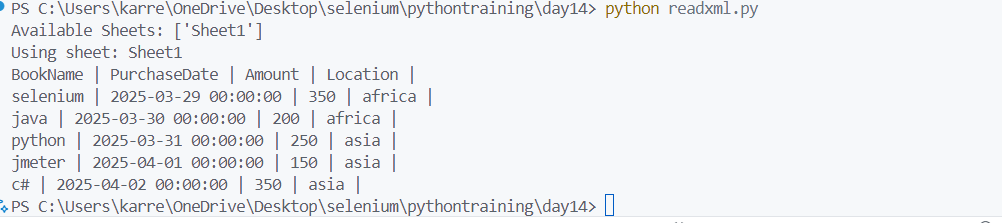

# **Write Data From Excel Demo1**



```
import openpyxl

file = r"C:\Users\karre\Downloads\test.xlsx"  # Use raw string to avoid path issues
workbook = openpyxl.load_workbook(file)
sheet = workbook.active  # Get active sheet if there is only one sheet in the excel file

# Write "Hello" in a 5x3 grid
for r in range(1, 6):  # Rows 1 to 5
    for c in range(1, 4):  # Columns 1 to 3
        sheet.cell(row=r, column=c).value = "Hello"

# Save changes
workbook.save(file)
print("Workbook updated successfully!")

```



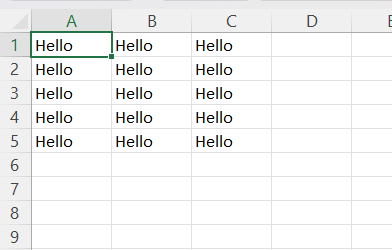

# **demo2**



```
import openpyxl

# Path to your Excel file
file = r"C:\Users\karre\Downloads\test2.xlsx"

# Load the workbook and select the active sheet
workbook = openpyxl.load_workbook(file)
sheet = workbook.active  
# (Optional) If you want a specific sheet, use: sheet = workbook["Data"]

# Writing data to specific cells
sheet.cell(1, 1).value = 123
sheet.cell(1, 2).value = "smith"
sheet.cell(1, 3).value = "engineer"

sheet.cell(2, 1).value = 567
sheet.cell(2, 2).value = "john"
sheet.cell(2, 3).value = "manager"

sheet.cell(3, 1).value = 567
sheet.cell(3, 2).value = "david"
sheet.cell(3, 3).value = "developer"

# Save the changes
workbook.save(file)

print("Data written successfully!")

```



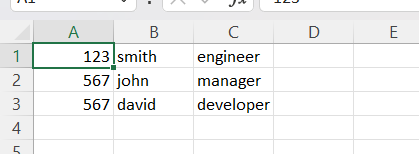

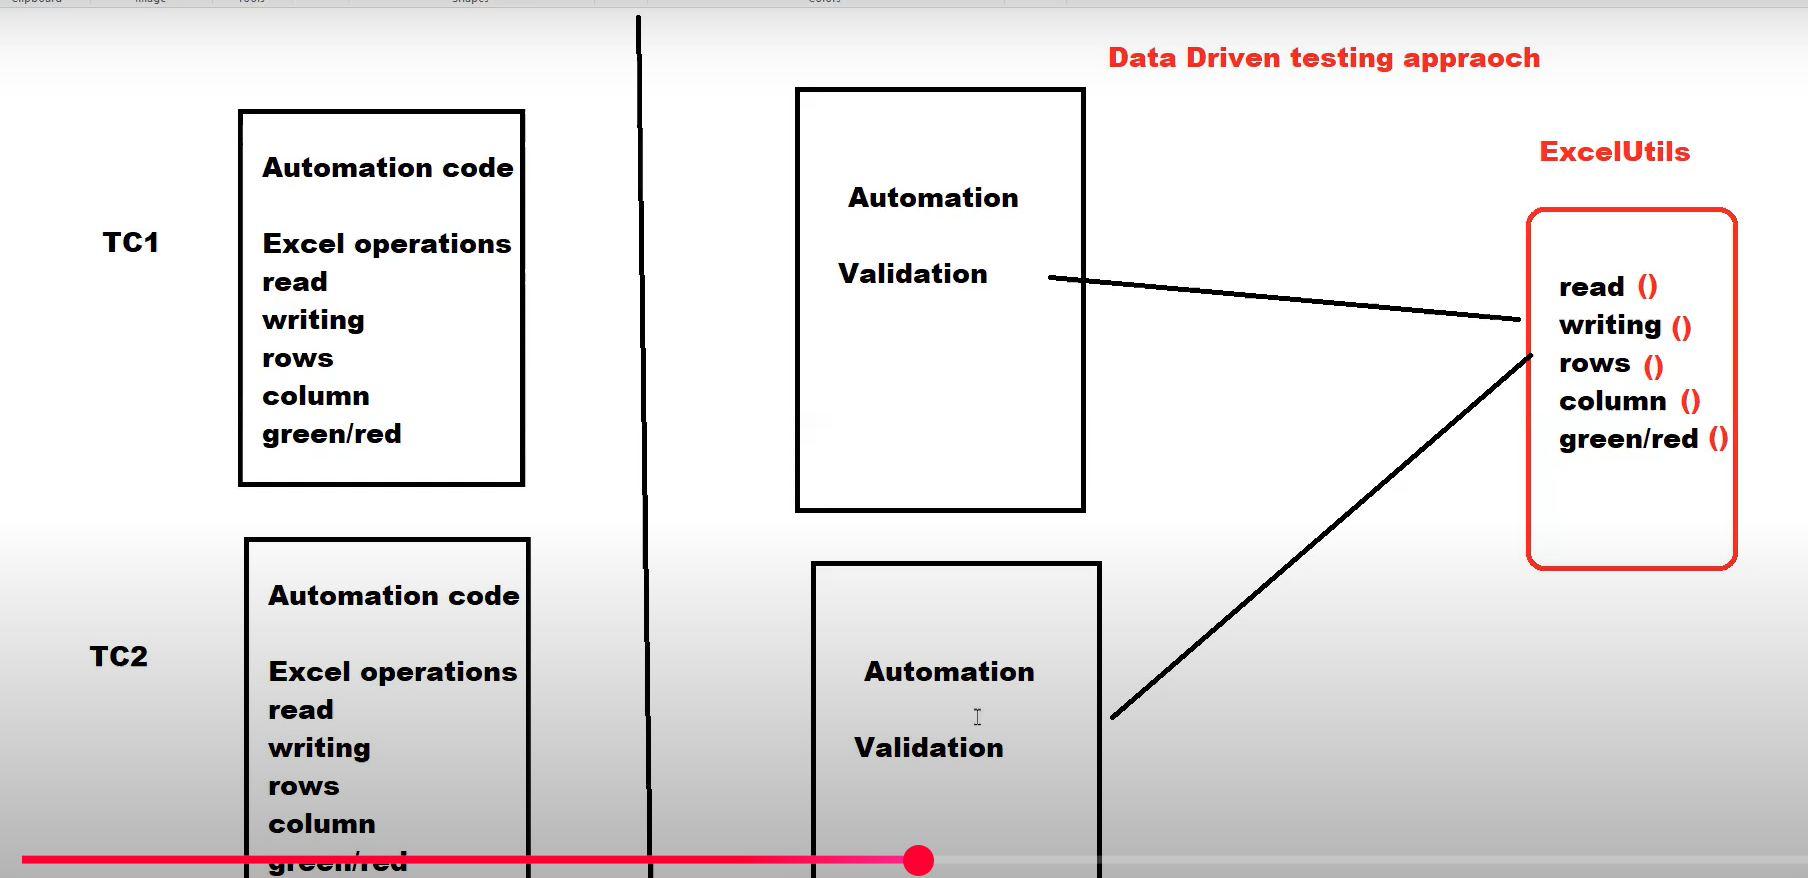

**Data-Driven Testing is a software testing methodology where test data is stored in external sources like Excel, CSV, or databases. It allows you to run the same set of test cases with multiple data inputs without modifying the core test logic.**

# **what is mean by ExcelUtils Class?**

**The ExcelUtils class refers to a utility/helper class designed to manage and streamline Excel-related operations in a data-driven testing framework. Instead of writing repetitive Excel-handling code in each test case, you place all those common functions inside ExcelUtils and call them when needed.**

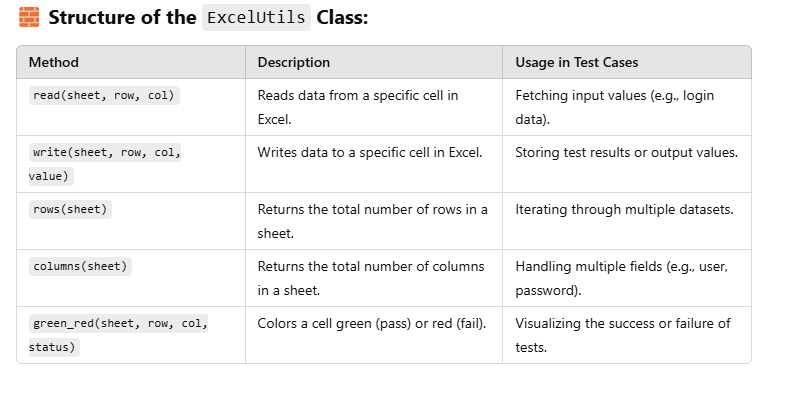

**Why Use an ExcelUtils Class?**

Reusability: Avoid code duplication by writing Excel logic once.

Maintainability: If the Excel structure changes, you only update the utility class.

Scalability: Easily handle multiple test cases and large datasets.

Clarity: Keeps the test cases clean and focused on business logic.



```
pythontraining/
├── day14/
│    ├── fixeddepositecal.py
│    └── XLutils.py

```





```
import openpyxl
from openpyxl.styles import PatternFill

# Get row count
def getRowCount(file, sheetName):
    workbook = openpyxl.load_workbook(file)
    sheet = workbook[sheetName]
    return sheet.max_row

# Get column count
def getColumnCount(file, sheetName):
    workbook = openpyxl.load_workbook(file)
    sheet = workbook[sheetName]
    return sheet.max_column

# Read data from a cell
def readData(file, sheetName, rownum, columnno):
    workbook = openpyxl.load_workbook(file)
    sheet = workbook[sheetName]
    return sheet.cell(row=rownum, column=columnno).value

# Write data to a cell
def writeData(file, sheetName, rownum, columnno, data):
    workbook = openpyxl.load_workbook(file)
    sheet = workbook[sheetName]
    sheet.cell(row=rownum, column=columnno).value = data
    workbook.save(file)

# Fill cell with color
def fillCellColor(file, sheetName, rownum, columnno, color):
    workbook = openpyxl.load_workbook(file)
    sheet = workbook[sheetName]
    fill = PatternFill(start_color=color, end_color=color, fill_type="solid")
    sheet.cell(row=rownum, column=columnno).fill = fill
    workbook.save(file)

```

